# Problem 1

In [21]:
# Sim constants
Years = 20
Steps = Years * 365

# Measles properties
beta = 0.01
gamma = 0.1
alpha = 0.005

set.seed(42)


### Subproblem c:

In [22]:
# Make markov chain vector

run_20_years <- function(Steps) {

chain = integer(Steps)

    # Simulate over 20 years
    for (i in 2:length(chain)) {
        # Generate random variable
        s = runif(1,0,1)
    
        # If in state 0
        if(chain[i-1] == 0) {
            # S -> I with prob beta, else stay S
            if(s < beta){
                chain[i] = 1
            } else {
                chain[i] = 0
            }
        }
    
        # If in state 1
        if(chain[i-1] == 1) {
            # I -> R with prob gamma, else stay I
            if(s < gamma){
                chain[i] = 2
            } else {
                chain[i] = 1
            }
        }
        
        # If in state 2
        if(chain[i-1] == 2) {
            # R -> S with prob alpha, else stay R
            if(s < alpha){
                chain[i] = 0
            } else {
                chain[i] = 2
            }
        }
    }
    return(chain)
}

chain = run_20_years(Steps)

# Count number of days in states
days_of_state_0 <- sum(chain == 0)
days_of_state_1 <- sum(chain == 1)
days_of_state_2 <- sum(chain == 2)

print("Days in state 0: ")
print(days_of_state_0)
print("Days in state 1: ")
print(days_of_state_1)
print("Days in state 2: ")
print(days_of_state_2)

print("total")
print(days_of_state_0 + days_of_state_1 + days_of_state_2)

[1] "Days in state 0: "
[1] 3168
[1] "Days in state 1: "
[1] 290
[1] "Days in state 2: "
[1] 3842
[1] "total"
[1] 7300


In [23]:
# Compute mean days spent in each state from the last 10 years
find_mean_days <- function(chain) {

mean_time_0 = sum(chain[3651:Steps] == 0) / 10
mean_time_1 = sum(chain[3651:Steps] == 1) / 10
mean_time_2 = sum(chain[3651:Steps] == 2) / 10
print("mean days used in state S: ")
print(mean_time_0)
print("mean days used in state I: ")
print(mean_time_1)
print("mean days used in state R: ")
print(mean_time_2)
    # return a simple numeric vector (S, I, R)
    return(c(mean_time_0, mean_time_1, mean_time_2))
}


In [24]:
# Simulate 30 iterations and compute CI

# Generate 30 
estimates <- matrix(NA_real_, nrow = 30, ncol = 3)
colnames(estimates) <- c("S","I","R")

for(i in 1:30) {
    chain_i <- run_20_years(Steps)
    estimates[i, ] <- find_mean_days(chain_i)
}

# Approx 95% CIs using student t approx: mean ± 2.042 * sd/sqrt(30)
S_mean <- mean(estimates[, "S"]); S_se <- sd(estimates[, "S"]) / sqrt(30)
I_mean <- mean(estimates[, "I"]); I_se <- sd(estimates[, "I"]) / sqrt(30)
R_mean <- mean(estimates[, "R"]); R_se <- sd(estimates[, "R"]) / sqrt(30)

S_CI <- c(S_mean - 2.042*S_se, S_mean + 2.042*S_se)
I_CI <- c(I_mean - 2.042*I_se, I_mean + 2.042*I_se)
R_CI <- c(R_mean - 2.042*R_se, R_mean + 2.042*R_se)

print("Approx 95% CI for mean days/year (last 10 years):")
print(paste0("S: mean=", round(S_mean,2), ", CI=[", round(S_CI[1],2), ", ", round(S_CI[2],2), "]"))
print(paste0("I: mean=", round(I_mean,2), ", CI=[", round(I_CI[1],2), ", ", round(I_CI[2],2), "]"))
print(paste0("R: mean=", round(R_mean,2), ", CI=[", round(R_CI[1],2), ", ", round(R_CI[2],2), "]"))

[1] "mean days used in state S: "
[1] 156.1
[1] "mean days used in state I: "
[1] 6.9
[1] "mean days used in state R: "
[1] 202
[1] "mean days used in state S: "
[1] 189.1
[1] "mean days used in state I: "
[1] 3.4
[1] "mean days used in state R: "
[1] 172.5
[1] "mean days used in state S: "
[1] 128.1
[1] "mean days used in state I: "
[1] 17.9
[1] "mean days used in state R: "
[1] 219
[1] "mean days used in state S: "
[1] 122.6
[1] "mean days used in state I: "
[1] 8.4
[1] "mean days used in state R: "
[1] 234
[1] "mean days used in state S: "
[1] 163.2
[1] "mean days used in state I: "
[1] 13.7
[1] "mean days used in state R: "
[1] 188.1
[1] "mean days used in state S: "
[1] 83.6
[1] "mean days used in state I: "
[1] 15.4
[1] "mean days used in state R: "
[1] 266
[1] "mean days used in state S: "
[1] 111.4
[1] "mean days used in state I: "
[1] 4.4
[1] "mean days used in state R: "
[1] 249.2
[1] "mean days used in state S: "
[1] 129.7
[1] "mean days used in state I: "
[1] 12.3
[1] "mean

### Subproblem e:

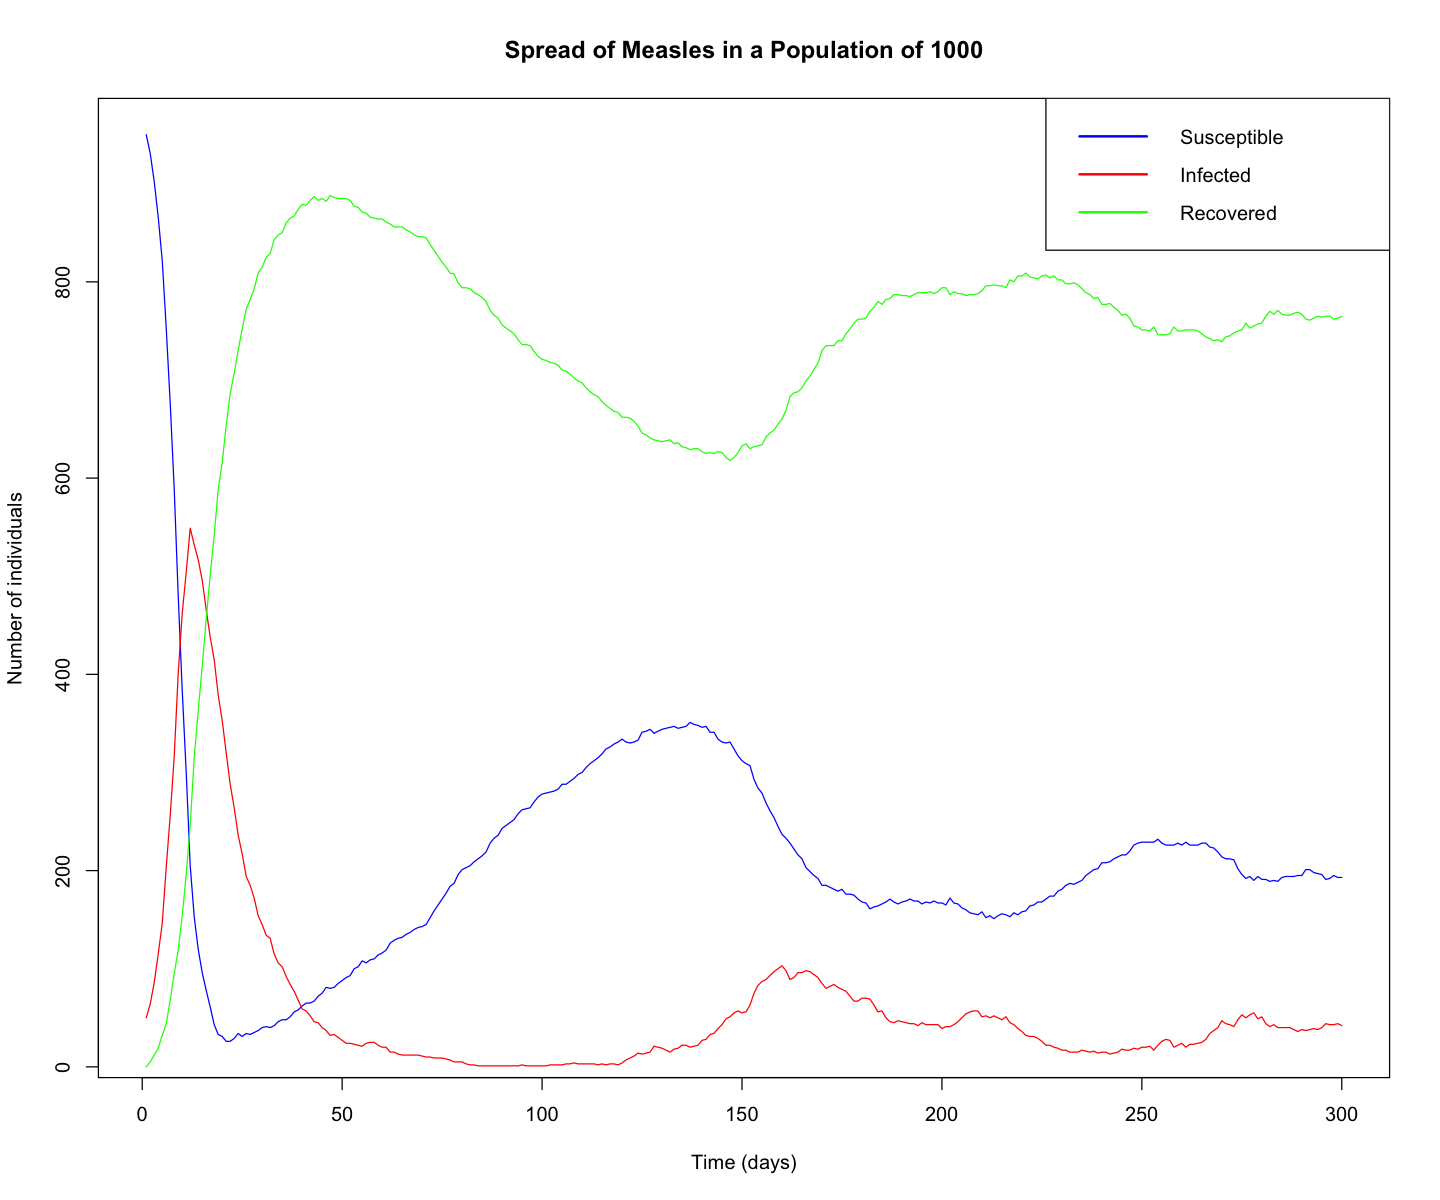

In [25]:
N <- 1000
steps <- 300
Y0 <- c(950, 50, 0)


beta_n <- function(infected, N) 0.5 * infected / N
    


spread_of_measles <- function(Y0, y_vaccinated, n, N){

    S <- integer(n); I <- integer(n); R <- integer(n)
    S[1] <- (Y0[1] - y_vaccinated); I[1] <- Y0[2]; R[1] <- Y0[3]

    for (i in 2:n){
        Sprev <- S[i-1]; Iprev <- I[i-1]; Rprev <- R[i-1]
        beta <- beta_n(Iprev, N - y_vaccinated)

        Inew <- rbinom(n = 1, p = beta, size = Sprev)
        Istay <- rbinom(n = 1, p = 1 - gamma, size = Iprev)
        Rstay <- rbinom(n = 1, p = 1 - alpha, size = Rprev)

        S[i] <- Sprev - Inew + (Rprev - Rstay)
        I[i] <- Inew + Istay
        R[i] <- Rstay + (Iprev - Istay)
    }

    return (list(S + y_vaccinated, I, R))
}

measle_spread <- spread_of_measles(Y0, y_vaccinated=0, steps, N)


par(bg="white")
options(repr.plot.width = 12, repr.plot.height = 10)
plot(1:steps, measle_spread[[1]], type='l', col='blue', xlab='Time (days)', ylab='Number of individuals', main='Spread of Measles in a Population of 1000')
lines(1:steps, measle_spread[[2]], type='l', col='red')
lines(1:steps, measle_spread[[3]], type='l', col='green')
legend("topright", legend=c("Susceptible", "Infected", "Recovered"), col=c("blue", "red", "green"), lty=1, lwd=2)




### Subproblem f:

In [26]:
n_sims <- 1000

max_infections <- function(Y0, y_vaccinated, n, N, n_sims){


    I_max_list <- c(); I_max_time_list <- c()

    for (i in 1:n_sims){
        I <- spread_of_measles(Y0, y_vaccinated, steps, N)[[2]]
        
        I_max <- 0; I_max_idx <- 0
        for (j in 1:steps){
            if (I[j] > I_max){
                I_max <- I[j]; I_max_idx <- j
            }
        }
        I_max_list <- c(I_max_list, I_max); I_max_time_list <- c(I_max_time_list, I_max_idx)
    }
    return (list(I_max_list, I_max_time_list))
}

result <- max_infections(Y0, y_vaccinated=0, steps, N, n_sims)
max_I <- result[[1]]
max_I_time <- result[[2]]

# Approx 95% CIs using normal approx: mean ± 1.96 * sd/sqrt(N)
E_max_I <- mean(max_I); sd_max_I <- sd(max_I) / sqrt(n_sims)
E_max_I_time <- mean(max_I_time); sd_max_I_time <- sd(max_I_time) / sqrt(n_sims)

I_max_CI <- c(E_max_I - 1.96*sd_max_I, E_max_I + 1.96*sd_max_I)
I_max_time_CI <- c(E_max_I_time - 1.96*sd_max_I_time, E_max_I_time + 1.96*sd_max_I_time)


print("Approx 95% CI for max number of infected individuals and time at max infection:")
print(paste0("E(I_max) = ", round(E_max_I,2), ", CI = [", round(I_max_CI[1],2), ", ", round(I_max_CI[2],2), "]"))
print(paste0("E(t_max) = ", round(E_max_I_time,2), ", CI = [", round(I_max_time_CI[1],2), ", ", round(I_max_time_CI[2],2), "]"))

[1] "Approx 95% CI for max number of infected individuals and time at max infection:"
[1] "E(I_max) = 522.52, CI = [521.25, 523.79]"
[1] "E(t_max) = 12.79, CI = [12.74, 12.84]"


### Subproblem g

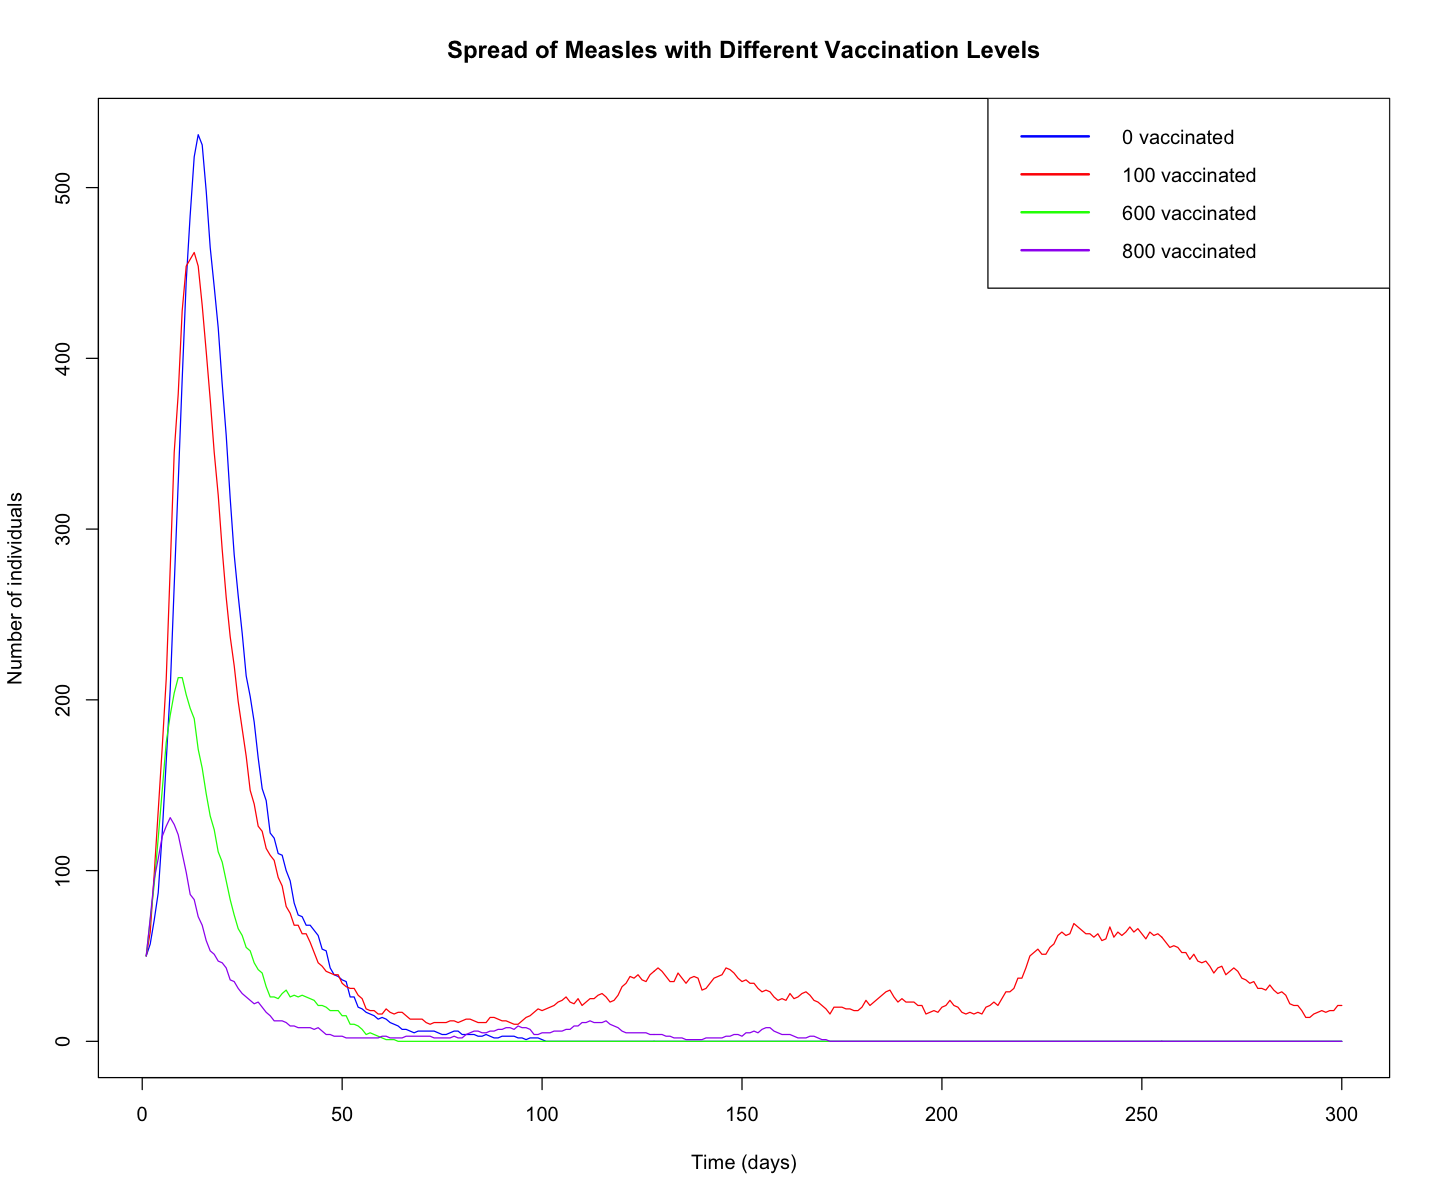

In [27]:


infections_0_vac <- spread_of_measles(Y0, y_vaccinated=0, steps, N)[[2]]
infections_100_vac <- spread_of_measles(Y0, y_vaccinated=100, steps, N)[[2]]
infections_600_vac <- spread_of_measles(Y0, y_vaccinated=600, steps, N)[[2]]
infections_800_vac <- spread_of_measles(Y0, y_vaccinated=800, steps, N)[[2]]


par(bg="white")
options(repr.plot.width = 12, repr.plot.height = 10)
plot(1:steps, infections_0_vac, type='l', col='blue', xlab='Time (days)', ylab='Number of individuals', main='Spread of Measles with Different Vaccination Levels')
lines(1:steps, infections_100_vac, type='l', col='red')
lines(1:steps, infections_600_vac, type='l', col='green')
lines(1:steps, infections_800_vac, type='l', col='purple')
legend("topright", legend=c("0 vaccinated", "100 vaccinated", "600 vaccinated", "800 vaccinated"), col=c("blue", "red", "green", "purple"), lty=1, lwd=2)



In [28]:
max_I_0_vac <- max_infections(Y0, y_vaccinated=0, steps, N, n_sims)[[1]]
max_I_100_vac <- max_infections(Y0, y_vaccinated=100, steps, N, n_sims)[[1]]
max_I_600_vac <- max_infections(Y0, y_vaccinated=600, steps, N, n_sims)[[1]]
max_I_800_vac <- max_infections(Y0, y_vaccinated=800, steps, N, n_sims)[[1]]

E_max_I_0_vac <- mean(max_I_0_vac)
E_max_I_100_vac <- mean(max_I_100_vac)
E_max_I_600_vac <- mean(max_I_600_vac)
E_max_I_800_vac <- mean(max_I_800_vac)

print("Expected max number of infected individuals with different vaccination levels:")
print(paste0("E(I_max) with 0 vaccinated = ", round(E_max_I_0_vac,2)))
print(paste0("E(I_max) with 100 vaccinated = ", round(E_max_I_100_vac,2)))
print(paste0("E(I_max) with 600 vaccinated = ", round(E_max_I_600_vac,2)))
print(paste0("E(I_max) with 800 vaccinated = ", round(E_max_I_800_vac,2)))

[1] "Expected max number of infected individuals with different vaccination levels:"
[1] "E(I_max) with 0 vaccinated = 522.31"
[1] "E(I_max) with 100 vaccinated = 471.69"
[1] "E(I_max) with 600 vaccinated = 217.26"
[1] "E(I_max) with 800 vaccinated = 115.44"


# Problem 2

In [29]:

set.seed(123)

lambda <- 1.5     # claims per day
t <- 59           # days
mu <- lambda * t  # mean of Poisson distribution

# Exact probability
p_exact <- ppois(100, lambda = mu, lower.tail = FALSE)
p_exact

# Monte Carlo simulation
n_sims <- 1000
X_vals <- rpois(n_sims, mu)

# Estimate probability
p_hat <- mean(X_vals > 100)

# Standard error of estimate
se_hat <- sqrt(p_hat * (1 - p_hat) / n_sims)

cat("Exact probability:", round(p_exact, 5), "\n")
cat("Monte Carlo estimate:", round(p_hat, 5), "\n")
cat("Monte Carlo SE:", round(se_hat, 5), "\n")



[1] 0.1028222

Exact probability: 0.10282 
Monte Carlo estimate: 0.085 
Monte Carlo SE: 0.00882 


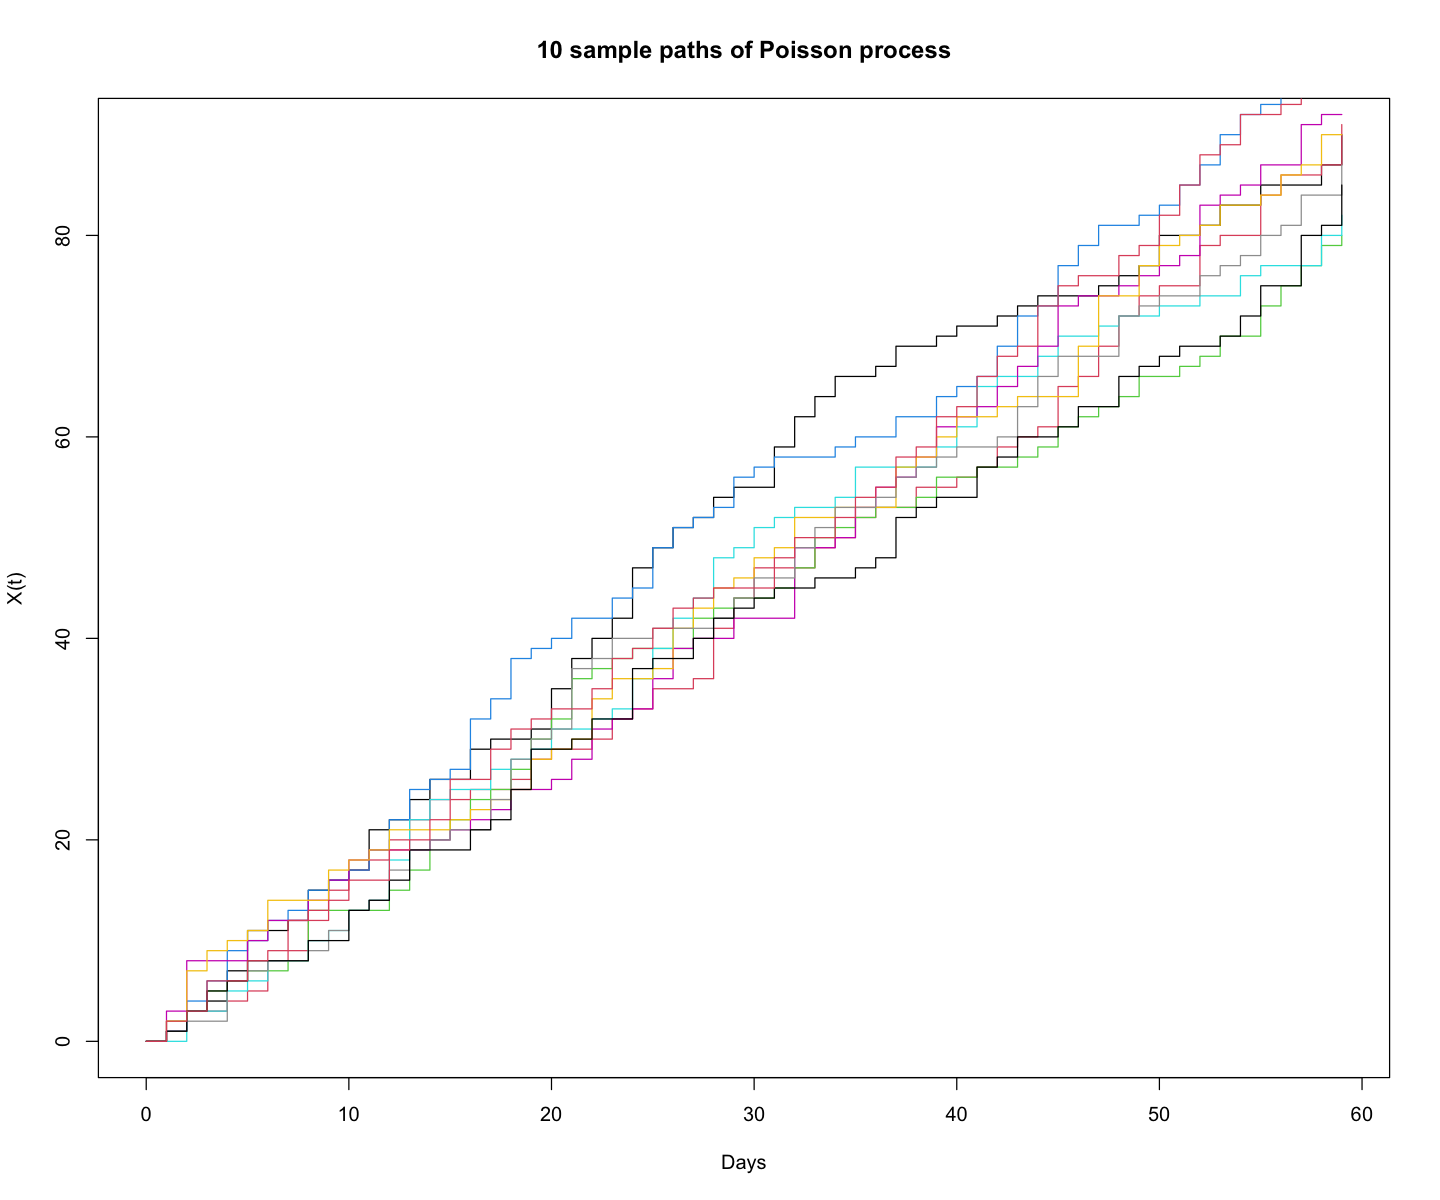

In [30]:
set.seed(123)

lambda <- 1.5
Tmax <- 59
n_paths <- 10

# Simulate paths: Poisson increments day by day
paths <- replicate(n_paths, cumsum(rpois(Tmax, lambda)), simplify = FALSE)

# Plot
plot(0:Tmax, c(0, paths[[1]]), type = "s", col = 1,
     xlab = "Days", ylab = "X(t)",
     main = "10 sample paths of Poisson process")
for (i in 2:n_paths) {
  lines(0:Tmax, c(0, paths[[i]]), type = "s", col = i)
}

In [31]:
set.seed(123)

lambda <- 1.5   # arrivals per day
gamma  <- 10    # Exp(rate=10) claim sizes (in mill. kr)
Tmax   <- 59
n_sims <- 1000

# --- Monte Carlo estimate of P(Z(59) > 8) ---
Z_T <- numeric(n_sims)
for (i in 1:n_sims) {
  N <- rpois(1, lambda * Tmax)        # number of claims in [0,59]
  if (N == 0) {
    Z_T[i] <- 0
  } else {
    Z_T[i] <- sum(rexp(N, rate = gamma))  # total claim amount
  }
}
p_hat <- mean(Z_T > 8)
se_hat <- sqrt(p_hat * (1 - p_hat) / n_sims)

cat("Estimated P(Z(59) > 8):", round(p_hat, 5), "\n")
cat("Monte Carlo SE:", round(se_hat, 5), "\n")

# --- Ten simple sample paths (daily increments) ---
n_paths <- 10
paths_Z <- vector("list", n_paths)
for (j in 1:n_paths) {
  daily_amounts <- sapply(1:Tmax, function(d) {
    K <- rpois(1, lambda)                 # claims that day
    if (K == 0) 0 else sum(rexp(K, rate = gamma))
  })
  paths_Z[[j]] <- c(0, cumsum(daily_amounts))  # length 60 (0..59)
}


# Save figure for LaTeX


Estimated P(Z(59) > 8): 0.717 
Monte Carlo SE: 0.01424 


if (!dir.exists("figs")) dir.create("figs", recursive = TRUE)
pdf("figs/z_paths_10.pdf", width = 7, height = 5)
plot(0:Tmax, paths_Z[[1]], type = "s", xlab = "Days", ylab = "Z(t) (mill. kr)",
     main = "10 sample paths of total claim amount Z(t)")
for (j in 2:n_paths) lines(0:Tmax, paths_Z[[j]], type = "s")
grid()
dev.off()
